In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats
import datetime as dt
from pmdarima.arima import ndiffs
import pmdarima as pm

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head(5)

,date,unemp,cpi,abi,hi,er,call
0,2000-01-01,5.4,1.9,28.6,NaN,1.3,4.78
1,2000-02-01,5.4,1.8,21.2,NaN,0.6,5.02
2,2000-03-01,4.8,2.1,19.9,NaN,2.9,5.10
3,2000-04-01,4.2,1.4,21.4,NaN,2.6,5.10
4,2000-05-01,3.8,1.1,21.8,NaN,0.8,5.12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    264 non-null    datetime64[ns]
 1   unemp   264 non-null    float64       
 2   cpi     264 non-null    float64       
 3   abi     264 non-null    float64       
 4   hi      192 non-null    float64       
 5   er      264 non-null    float64       
 6   call    264 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.6 KB


In [5]:
df_hi = df['hi'].dropna()

## 19대 대선: 2017년 5월 9일

# 변수들의 시계열 그래프 확인

### 실업률

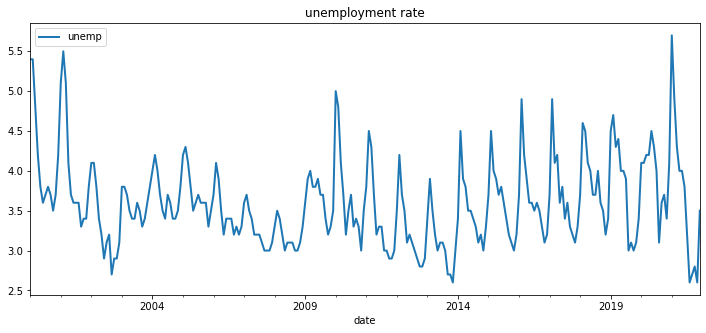

In [6]:
df.plot(x = 'date', y ='unemp', kind='line',figsize=(12,5), lw=2, title="unemployment rate");

### 소비자물가지수

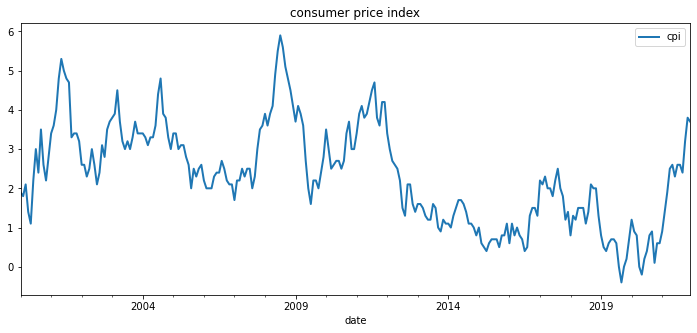

In [7]:
df.plot(x = 'date', y ='cpi', kind='line',figsize=(12,5), lw=2, title="consumer price index");

### 평잔증가량

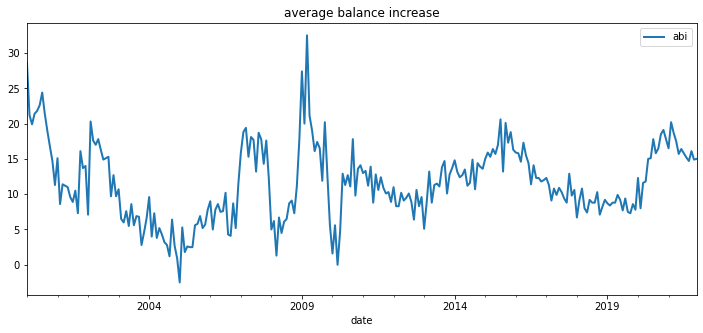

In [8]:
df.plot(x = 'date', y ='abi', kind='line',figsize=(12,5), lw=2, title="average balance increase");

### 서울시 주택매매가격변동률

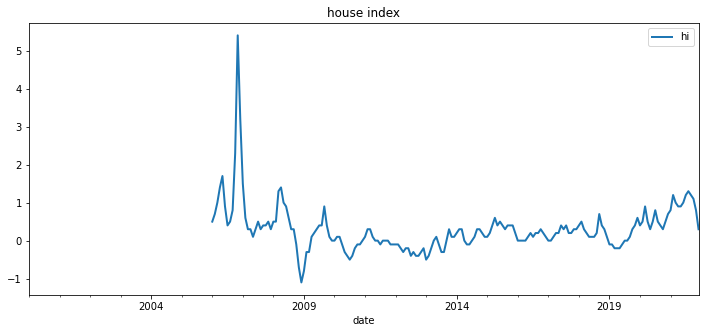

In [9]:
df.plot(x = 'date', y ='hi', kind='line',figsize=(12,5), lw=2, title="house index");

### 환율

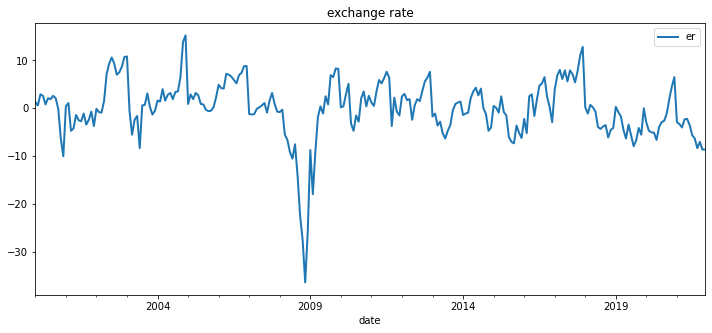

In [10]:
df.plot(x = 'date', y ='er', kind='line',figsize=(12,5), lw=2, title="exchange rate");

### 콜금리

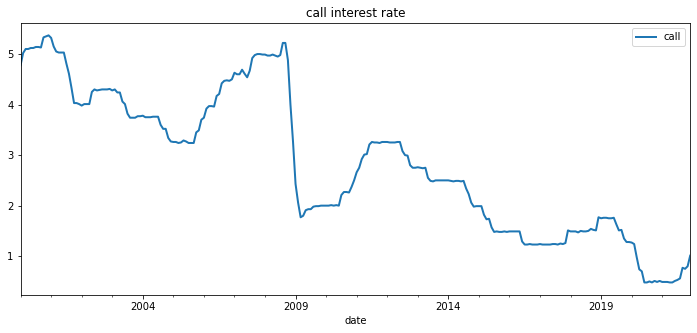

In [11]:
df.plot(x = 'date', y ='call', kind='line',figsize=(12,5), lw=2, title="call interest rate");

## 시계열의 계절성 확인

## 공통적으로 12주기의 계절성 요인이 확인됨 > 정상성 테스트 필요

### 실업률

<Figure size 432x288 with 0 Axes>

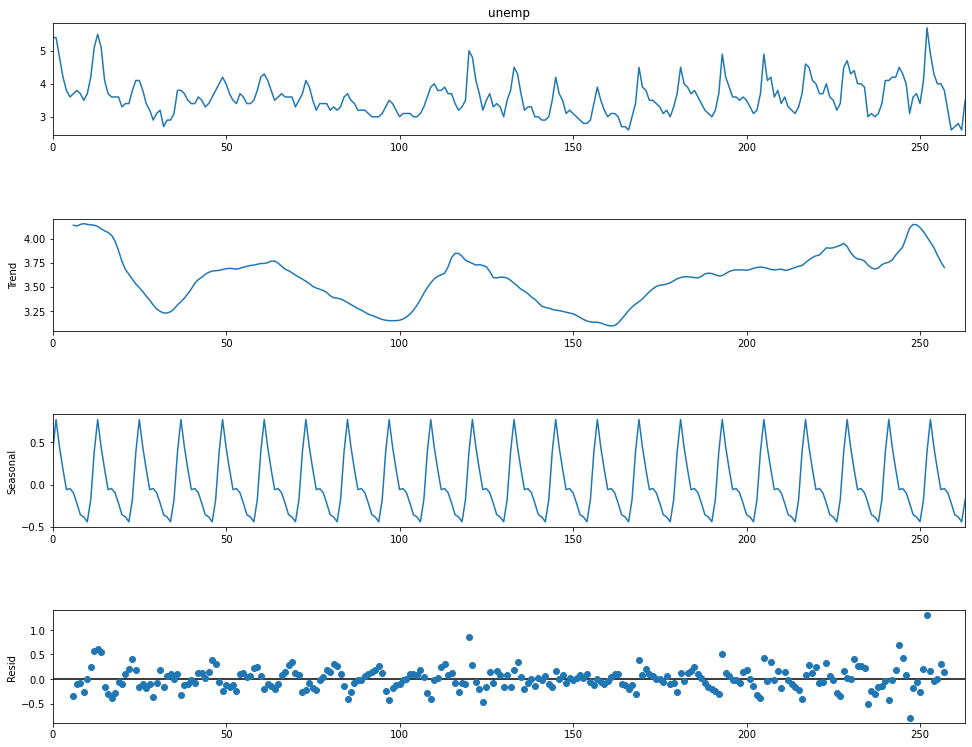

In [12]:
#seasonality 확인
result = seasonal_decompose(df['unemp'], model='additive', period = 12)

fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(15, 12)

### 소비자물가지수

<Figure size 432x288 with 0 Axes>

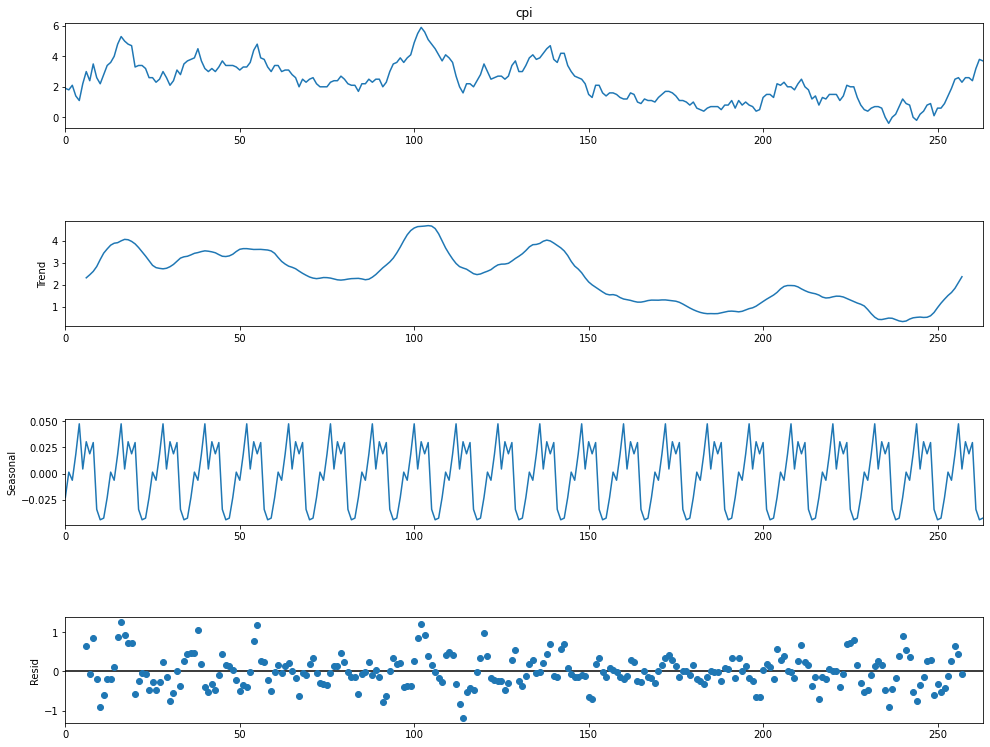

In [13]:
result = seasonal_decompose(df['cpi'], model='additive', period = 12)

fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(15, 12)

### 평잔증가량

<Figure size 432x288 with 0 Axes>

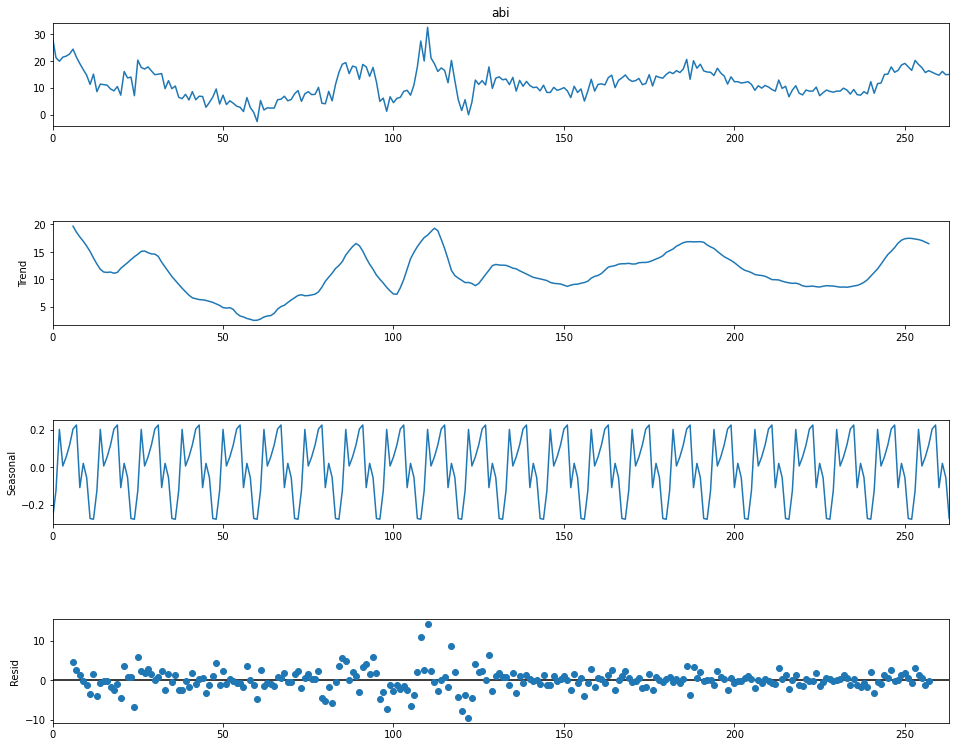

In [14]:
result = seasonal_decompose(df['abi'], model='additive', period = 12)

fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(15, 12)

### 서울시 주택매매가격변동률

<Figure size 432x288 with 0 Axes>

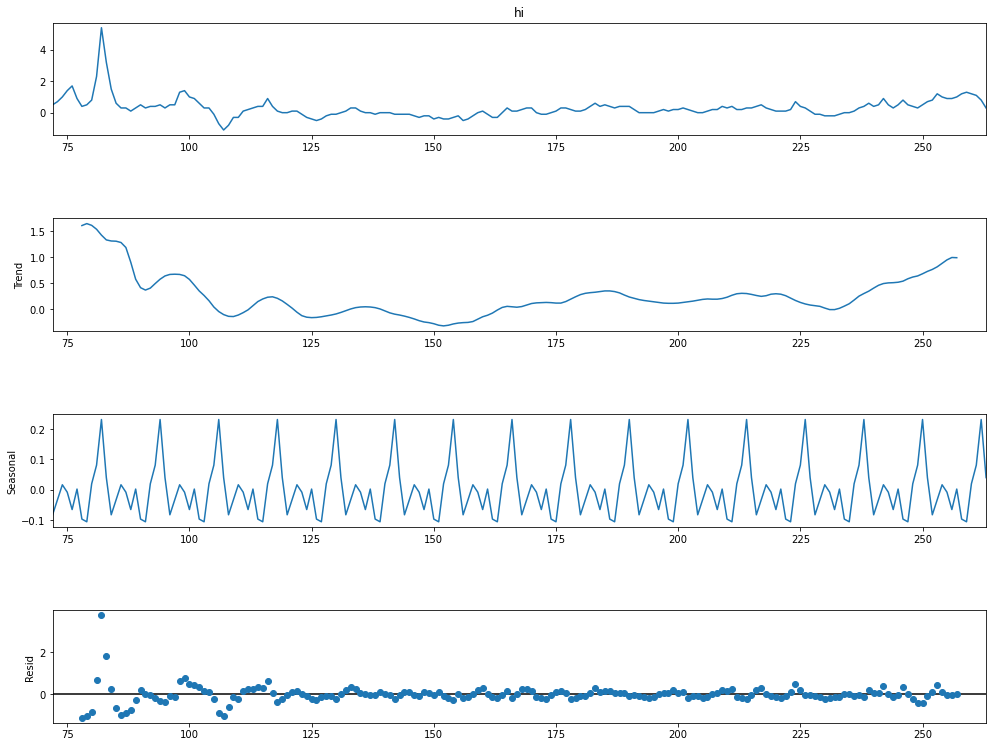

In [15]:
result = seasonal_decompose(df_hi, model='additive', period = 12)

fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(15, 12)

### 환율

<Figure size 432x288 with 0 Axes>

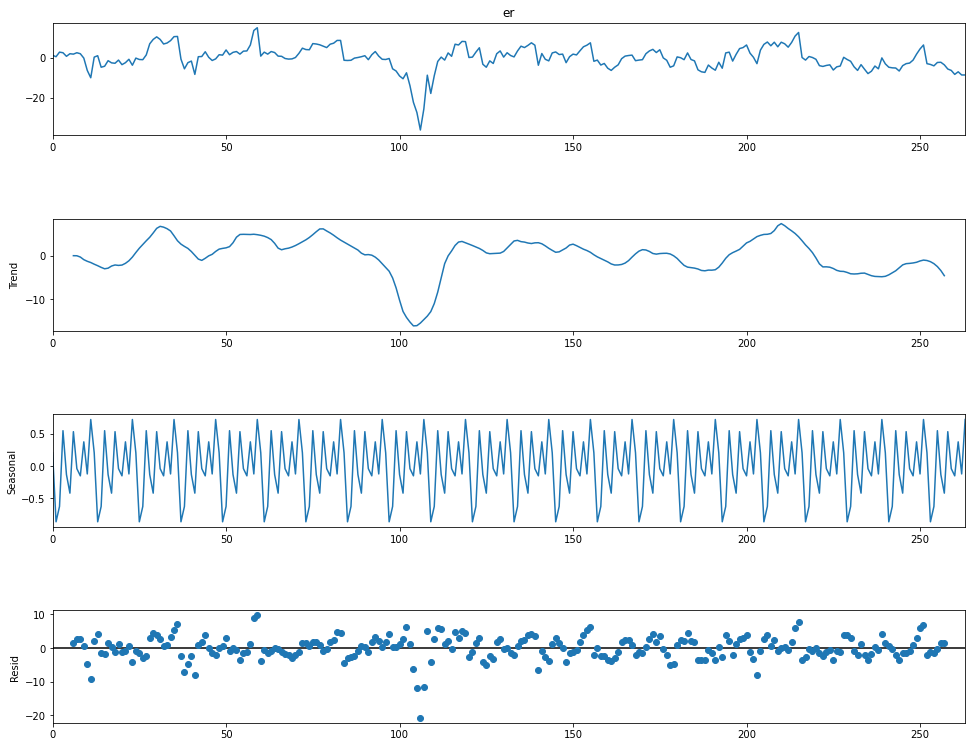

In [16]:
result = seasonal_decompose(df['er'], model='additive', period = 12)

fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(15, 12)

### 콜금리

<Figure size 432x288 with 0 Axes>

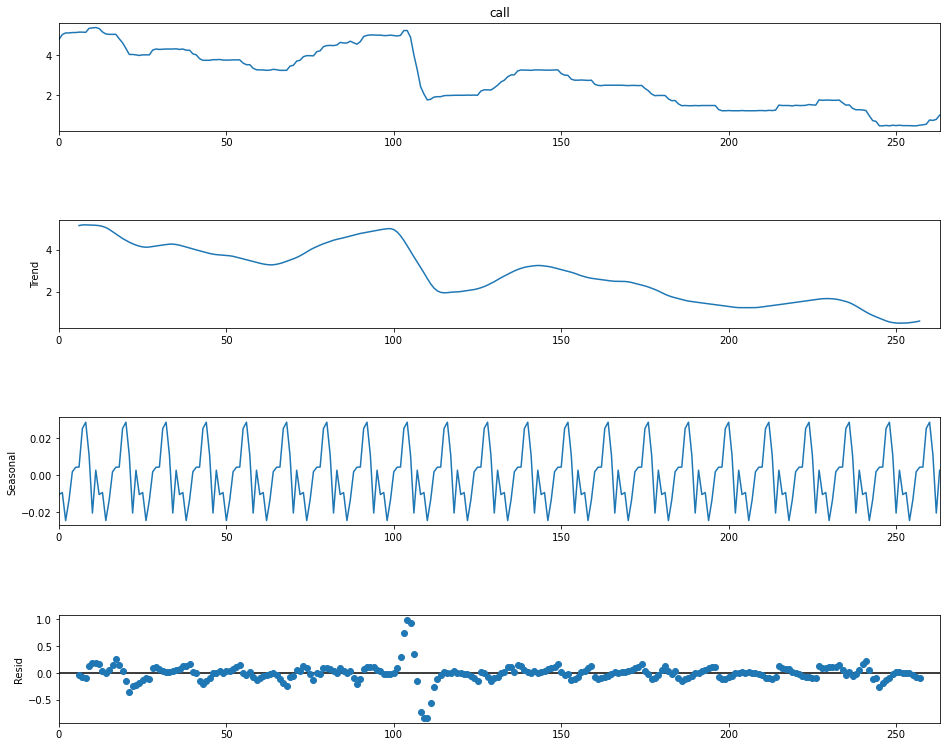

In [17]:
result = seasonal_decompose(df['call'], model='additive', period = 12)

fig = plt.figure()  
fig = result.plot()
fig.set_size_inches(15, 12)

## 정상성을 검정하기 위해 ADF 테스트를 수행

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

### 실업률 - stationary

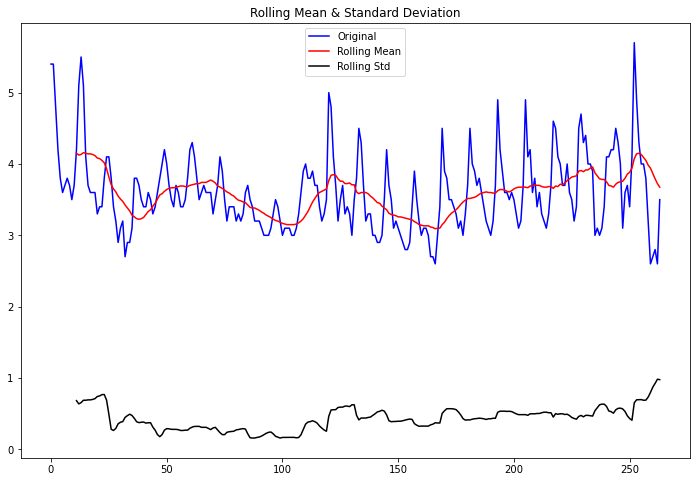

Results of Dickey-Fuller Test:
p-value = 0.0006. The series is likely stationary.
Test Statistic                  -4.233254
p-value                          0.000579
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [19]:
test_stationarity(df['unemp'])

### 소비자물가지수  non-stationary

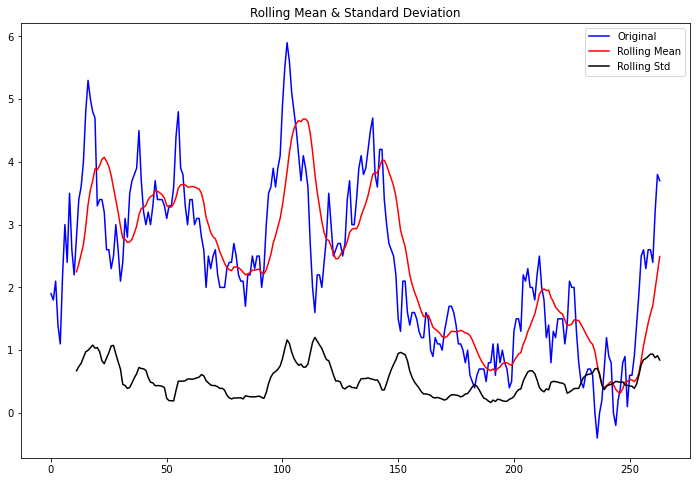

Results of Dickey-Fuller Test:
p-value = 0.1940. The series is likely non-stationary.
Test Statistic                  -2.234532
p-value                          0.193952
#Lags Used                      13.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [20]:
test_stationarity(df['cpi'])

### 평잔증가량 non-stationary

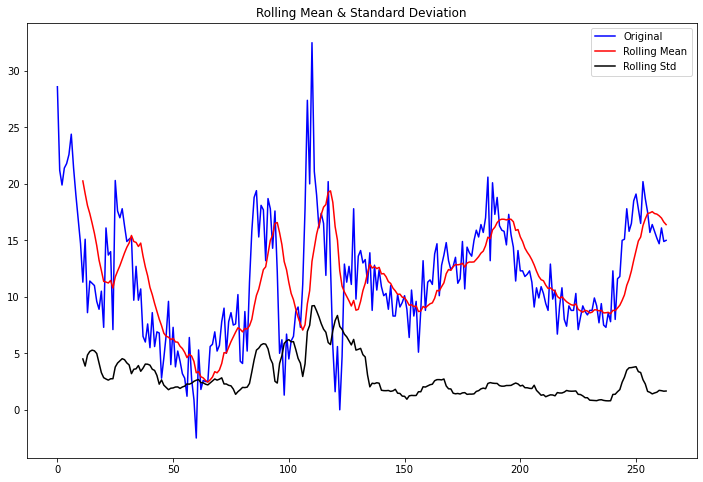

Results of Dickey-Fuller Test:
p-value = 0.2707. The series is likely non-stationary.
Test Statistic                  -2.036774
p-value                          0.270685
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [21]:
test_stationarity(df['abi'])

### 서울시 주택매매가격변동률 stationary

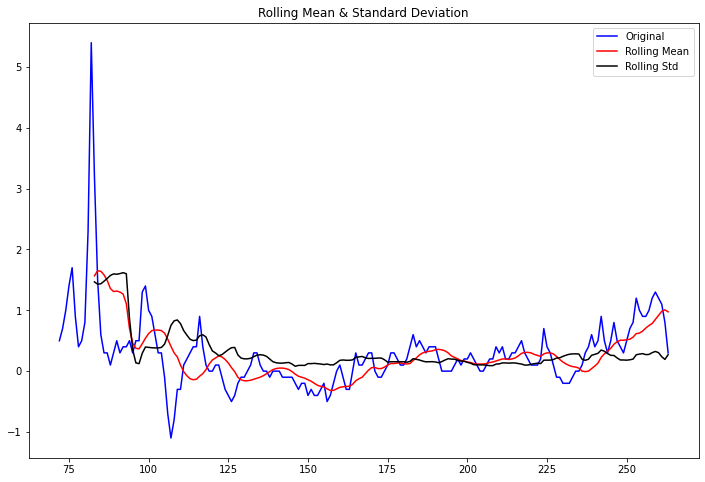

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -5.868077e+00
p-value                        3.289352e-07
#Lags Used                     1.000000e+00
Number of Observations Used    1.900000e+02
Critical Value (1%)           -3.465244e+00
Critical Value (5%)           -2.876875e+00
Critical Value (10%)          -2.574945e+00
dtype: float64


In [22]:
test_stationarity(df_hi)

### 환율 stationary

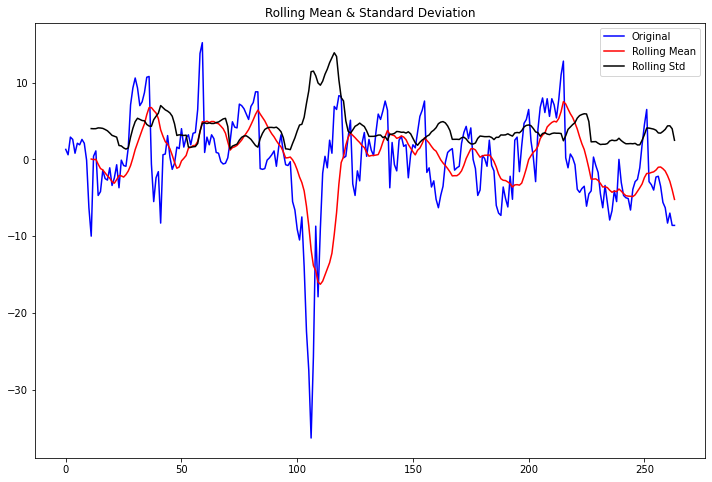

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -4.914449
p-value                          0.000033
#Lags Used                       0.000000
Number of Observations Used    263.000000
Critical Value (1%)             -3.455461
Critical Value (5%)             -2.872593
Critical Value (10%)            -2.572660
dtype: float64


In [23]:
test_stationarity(df['er'])

### 콜금리 non-stationary

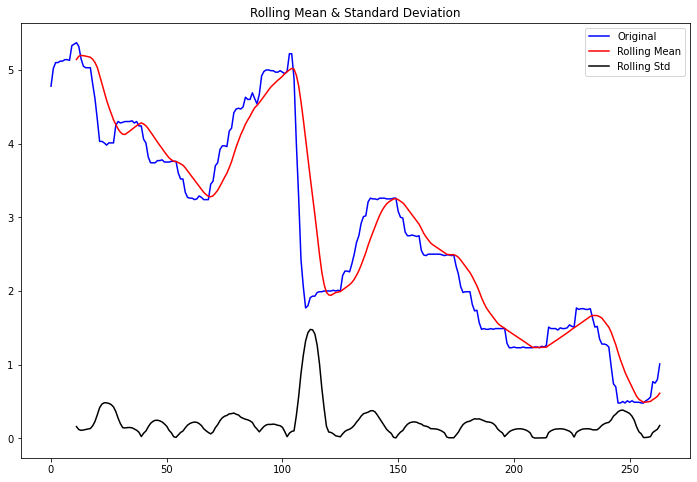

Results of Dickey-Fuller Test:
p-value = 0.4044. The series is likely non-stationary.
Test Statistic                  -1.752259
p-value                          0.404408
#Lags Used                       3.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64


In [24]:
test_stationarity(df['call'])

## 비정상 시계열인 변수: 소비자 물가 지수, 평잔증가량, 콜금리

## 1차 차분 수행

### 소비자물가지수_lag1

In [25]:
df['cpi_lag1'] = df['cpi'] - df['cpi'].shift(1)
df['abi_lag1'] = df['abi'] - df['abi'].shift(1)
df['call_lag1'] = df['call'] - df['call'].shift(1)

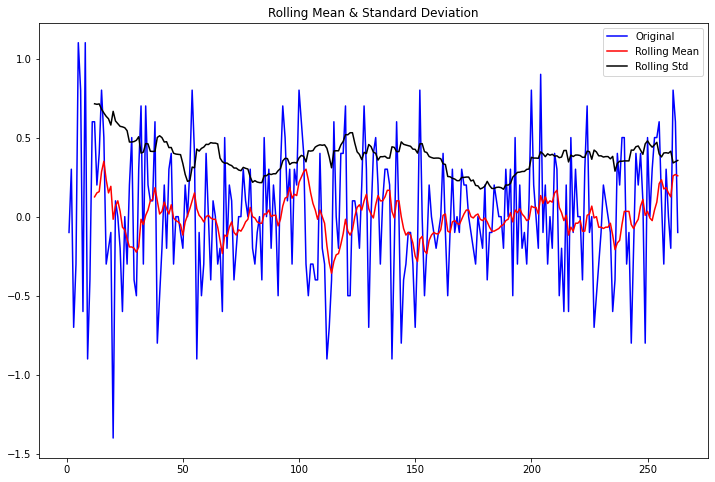

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.225516
p-value                          0.000008
#Lags Used                      12.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [26]:
test_stationarity(df['cpi_lag1'][1:])

### 평잔증가량_lag1

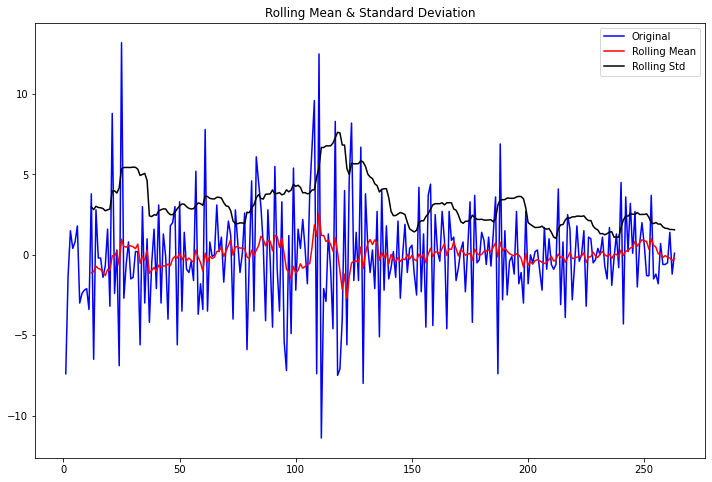

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.767839e+00
p-value                        7.269093e-17
#Lags Used                     1.200000e+01
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


In [27]:
test_stationarity(df['abi_lag1'][1:])

### 콜금리_lag1

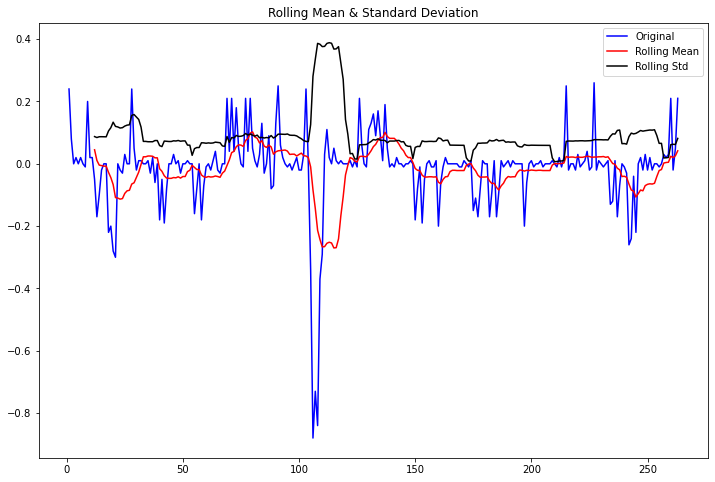

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.602894e+00
p-value                        6.666906e-09
#Lags Used                     2.000000e+00
Number of Observations Used    2.600000e+02
Critical Value (1%)           -3.455754e+00
Critical Value (5%)           -2.872721e+00
Critical Value (10%)          -2.572728e+00
dtype: float64


In [28]:
test_stationarity(df['call_lag1'][1:])

In [29]:
df.head()

,date,unemp,cpi,abi,hi,er,call,cpi_lag1,abi_lag1,call_lag1
0,2000-01-01,5.4,1.9,28.6,NaN,1.3,4.78,NaN,NaN,NaN
1,2000-02-01,5.4,1.8,21.2,NaN,0.6,5.02,-0.1,-7.4,0.24
2,2000-03-01,4.8,2.1,19.9,NaN,2.9,5.10,0.3,-1.3,0.08
3,2000-04-01,4.2,1.4,21.4,NaN,2.6,5.10,-0.7,1.5,0.00
4,2000-05-01,3.8,1.1,21.8,NaN,0.8,5.12,-0.3,0.4,0.02


## 변수들의 ACF, PACF 함수를 확인

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


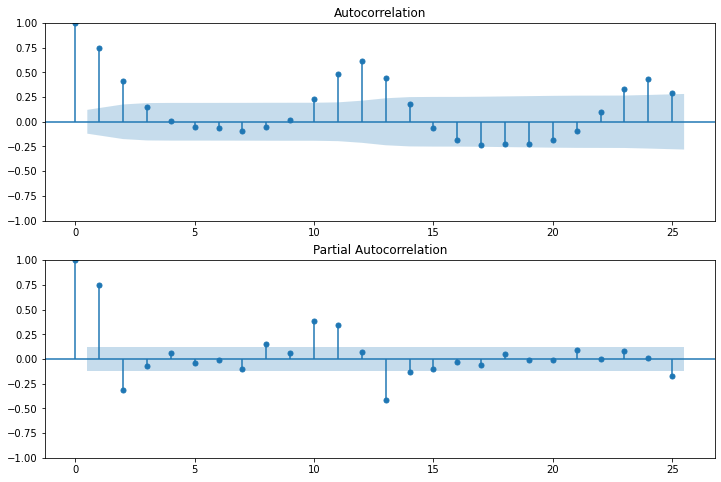

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['unemp'],  ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['unemp'],  ax=ax2)

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


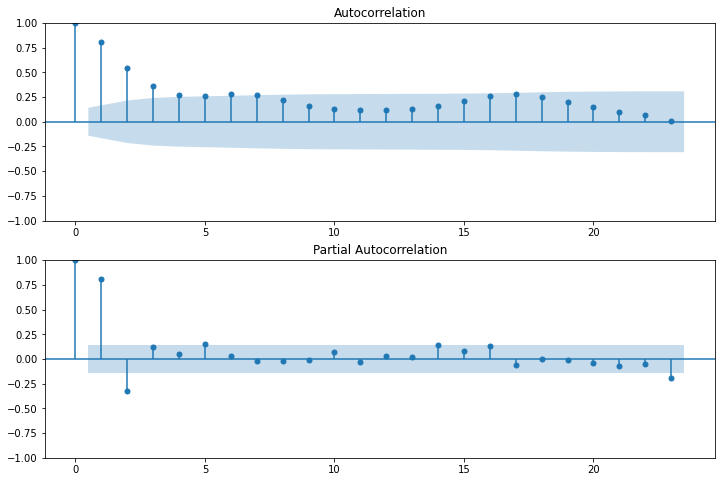

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_hi,  ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_hi,  ax=ax2)

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


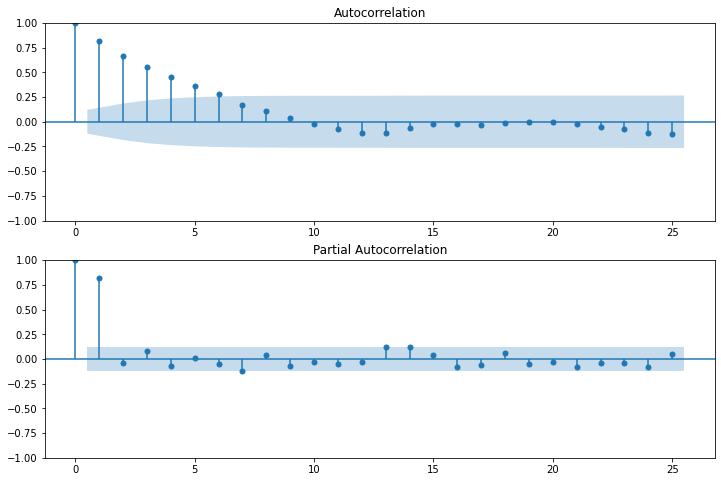

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['er'],  ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['er'],  ax=ax2)

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


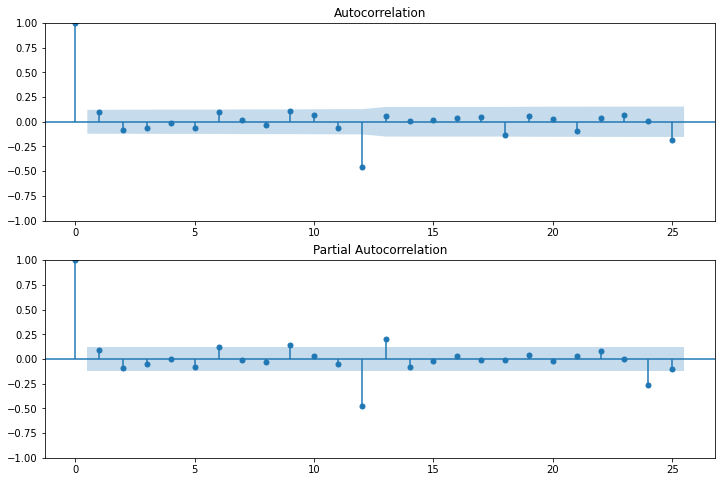

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['cpi_lag1'][1:],  ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['cpi_lag1'][1:],  ax=ax2)

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


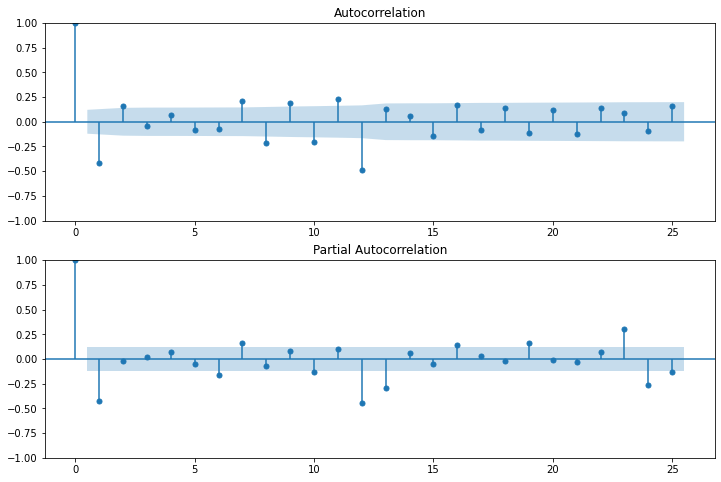

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['abi_lag1'][1:],  ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['abi_lag1'][1:],  ax=ax2)

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


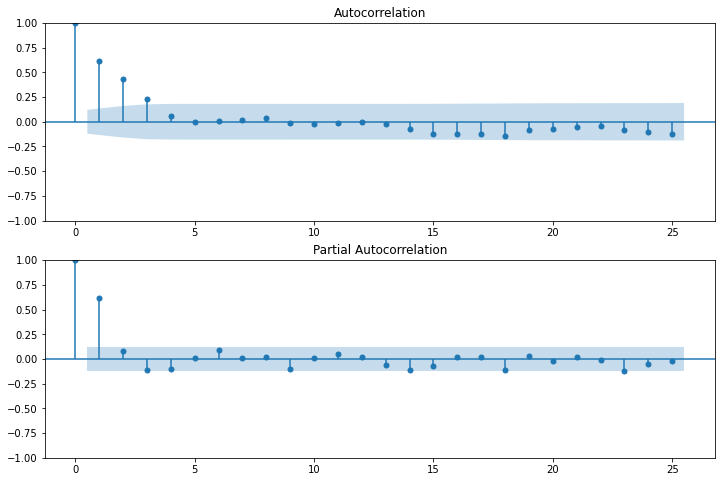

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['call_lag1'][1:],  ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['call_lag1'][1:],  ax=ax2)

## 개입 시기 이전의 시계열 생성

19대 대선: 2017년 5월 9일

In [36]:
df

,date,unemp,cpi,abi,hi,er,call,cpi_lag1,abi_lag1,call_lag1
0,2000-01-01,5.4,1.9,28.6,NaN,1.3,4.78,NaN,NaN,NaN
1,2000-02-01,5.4,1.8,21.2,NaN,0.6,5.02,-0.1,-7.4,0.24
2,2000-03-01,4.8,2.1,19.9,NaN,2.9,5.10,0.3,-1.3,0.08
3,2000-04-01,4.2,1.4,21.4,NaN,2.6,5.10,-0.7,1.5,0.00
4,2000-05-01,3.8,1.1,21.8,NaN,0.8,5.12,-0.3,0.4,0.02
...,...,...,...,...,...,...,...,...,...,...
259,2021-08-01,2.6,2.6,15.2,1.3,-6.3,0.56,0.0,-0.6,0.03
260,2021-09-01,2.7,2.4,14.7,1.2,-8.3,0.77,-0.2,-0.5,0.21
261,2021-10-01,2.8,3.2,16.1,1.1,-7.0,0.75,0.8,1.4,-0.02
262,2021-11-01,2.6,3.8,14.9,0.8,-8.6,0.80,0.6,-1.2,0.05


In [37]:
df_pre = df[df['date'] < '2017-06-01']

In [38]:
df_pre

,date,unemp,cpi,abi,hi,er,call,cpi_lag1,abi_lag1,call_lag1
0,2000-01-01,5.4,1.9,28.6,NaN,1.3,4.78,NaN,NaN,NaN
1,2000-02-01,5.4,1.8,21.2,NaN,0.6,5.02,-0.1,-7.4,0.24
2,2000-03-01,4.8,2.1,19.9,NaN,2.9,5.10,0.3,-1.3,0.08
3,2000-04-01,4.2,1.4,21.4,NaN,2.6,5.10,-0.7,1.5,0.00
4,2000-05-01,3.8,1.1,21.8,NaN,0.8,5.12,-0.3,0.4,0.02
...,...,...,...,...,...,...,...,...,...,...
204,2017-01-01,3.7,2.2,12.3,0.0,3.9,1.24,0.9,0.3,0.01
205,2017-02-01,4.9,2.1,11.3,0.0,6.8,1.23,-0.1,-1.0,-0.01
206,2017-03-01,4.1,2.3,9.1,0.1,8.0,1.23,0.2,-2.2,0.00
207,2017-04-01,4.2,2.0,10.8,0.2,6.1,1.23,-0.3,1.7,0.00


In [39]:
df_pre_hi = df_pre['hi'].dropna()

In [40]:
df_pre_hi

72     0.5
73     0.7
74     1.0
75     1.4
76     1.7
      ... 
204    0.0
205    0.0
206    0.1
207    0.2
208    0.2
Name: hi, Length: 137, dtype: float64

## auto arima를 통해 개입 이전 시계열에 대한 모수를 추정

In [41]:
# model = pm.auto_arima(y = y_train        # 데이터
#                       , d = 1            # 차분 차수, ndiffs 결과!
#                       , start_p = 0 
#                       , max_p = 3   
#                       , start_q = 0 
#                       , max_q = 3   
#                       , m = 1       
#                       , seasonal = False # 계절성 ARIMA가 아니라면 필수!
#                       , stepwise = True
#                       , trace=True
#                       )

# model = pm.auto_arima (y_train, d = 1, seasonal = False, trace = True)
# model.fit(y_train)

### 실업률

In [42]:
model_unemp = pm.auto_arima (df_pre['unemp'], d = 0, start_p = 0, start_q = 0, seasonal = True, trace = True)
model_unemp.fit(df_pre['unemp'])

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=317.875, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=128.974, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=184.371, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1129.374, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=103.132, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=102.990, Time=0.16 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=98.147, Time=0.14 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=100.143, Time=0.20 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=100.145, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=92.483, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=104.064, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=93.126, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=96.684, Time=0.13 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=100.586, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=136.447,

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True)

### 소비자물가지수

In [43]:
model_cpi_lag1 = pm.auto_arima (df_pre['cpi'], d = 1, start_p = 0, start_q = 0, seasonal = True, trace = True)
model_cpi_lag1.fit(df_pre['cpi'])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=217.125, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=217.760, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=217.353, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=215.125, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=218.545, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.137 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### 평잔증가량

In [44]:
model_abi_lag1 = pm.auto_arima (df_pre['abi'], d = 1, start_p = 0, start_q = 0, seasonal = True, trace = True)
model_abi_lag1.fit(df_pre['abi'])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1127.964, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1089.254, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1094.686, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1126.093, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1091.109, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1091.130, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1093.074, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1087.495, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1089.359, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1089.379, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1092.962, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1091.323, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.377 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### 주택매매가격변동률

In [45]:
model_hi = pm.auto_arima (df_pre_hi, d = 0, start_p = 0, start_q = 0, seasonal = True, trace = True)
model_hi.fit(df_pre_hi)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=290.569, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=155.540, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=186.966, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=304.112, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=141.849, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=142.063, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=142.342, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=140.680, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=142.372, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=155.715, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=144.338, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=141.464, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.479 seconds


ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

### 환율

In [46]:
model_er = pm.auto_arima (df_pre['er'], d = 0, start_p = 0, start_q = 0, seasonal = True, trace = True)
model_er.fit(df_pre['er'])

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1360.031, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1131.547, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1219.573, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1358.886, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1133.237, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1133.165, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1133.836, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1129.732, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1131.427, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1131.356, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1218.245, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1132.029, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.325 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### 콜금리

In [47]:
model_call_lag1 = pm.auto_arima (df_pre['call'], d = 1, start_p = 0, start_q = 0, seasonal = True, trace = True)
model_call_lag1.fit(df_pre['call'])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-236.694, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-357.582, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-310.860, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-235.429, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-355.728, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-355.674, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-357.189, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-359.124, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-357.303, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-357.238, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-310.838, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-358.786, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.676 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## 개입 시점 이후에 개입함수를 추가한 새로운 시계열을 생성

In [48]:
df['inter'] = (df['date']>='2017-06-01')
df['inter'] = df['inter'].astype(int)

In [49]:
df

,date,unemp,cpi,abi,hi,er,call,cpi_lag1,abi_lag1,call_lag1,inter
0,2000-01-01,5.4,1.9,28.6,NaN,1.3,4.78,NaN,NaN,NaN,0
1,2000-02-01,5.4,1.8,21.2,NaN,0.6,5.02,-0.1,-7.4,0.24,0
2,2000-03-01,4.8,2.1,19.9,NaN,2.9,5.10,0.3,-1.3,0.08,0
3,2000-04-01,4.2,1.4,21.4,NaN,2.6,5.10,-0.7,1.5,0.00,0
4,2000-05-01,3.8,1.1,21.8,NaN,0.8,5.12,-0.3,0.4,0.02,0
...,...,...,...,...,...,...,...,...,...,...,...
259,2021-08-01,2.6,2.6,15.2,1.3,-6.3,0.56,0.0,-0.6,0.03,1
260,2021-09-01,2.7,2.4,14.7,1.2,-8.3,0.77,-0.2,-0.5,0.21,1
261,2021-10-01,2.8,3.2,16.1,1.1,-7.0,0.75,0.8,1.4,-0.02,1
262,2021-11-01,2.6,3.8,14.9,0.8,-8.6,0.80,0.6,-1.2,0.05,1


### 작동 테스트

### 외생변수를 추가했을 때 모델이 동작하는가

In [50]:
model_unemp.fit(df['unemp'], exogenous=df[['inter']])

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True)

In [51]:
model_unemp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(3, 0, 1)   Log Likelihood                 -82.019
Date:                Fri, 25 Feb 2022   AIC                            178.038
Time:                        11:06:30   BIC                            203.069
Sample:                             0   HQIC                           188.096
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9319      0.948      0.983      0.326      -0.927       2.791
inter          0.2699      0.123      2.186      0.029       0.028       0.512
ar.L1          1.2747      0.796      1.601      0.109      -0.285       2.835
ar.L2         -0.5525      0.825     -0.670      0.503      -2.169       1.064
ar.L3          0.0147      0.300      0.049      0.961      -0.574       0.603
ma.L1         -0.2797      0.801     -0.349      0.727      -1.849       1.289
sigma2         0.1082      0.007     15.553      0.000       0.095       0.122
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               177.15
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               2.45   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX 모델 적합

### 실업률

In [52]:
mod1 = sm.tsa.statespace.SARIMAX(df['unemp'], df['inter'], order=(3,0,1), seasonal_order=(3, 0, 1, 12), enforce_stationarity=False,
                                    enforce_invertibility=False)

In [53]:
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              unemp   No. Observations:                  264
Model:             SARIMAX(3, 0, 1)x(3, 0, 1, 12)   Log Likelihood                  -0.484
Date:                            Fri, 25 Feb 2022   AIC                             20.968
Time:                                    11:06:33   BIC                             55.129
Sample:                                         0   HQIC                            34.756
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
inter          0.1607      0.242      0.665      0.506      -0.313       0.634
ar.L1          0.3309      2.167      0.153      0.879      -3.916       4.577
ar.L2          0.2844      1.397      0.204      0.839      -2.453       3.022
ar.L3          0.0431      0.209      0.206      0.837      -0.366       0.452
ma.L1          0.3076      2.176      0.141      0.888      -3.957       4.573
ar.S.L12       0.4243      0.507      0.837      0.403      -0.570       1.418
ar.S.L24       0.4633      0.283      1.635      0.102      -0.092       1.019
ar.S.L36       0.1047      0.228      0.458      0.647      -0.343       0.552
ma.S.L12       0.1082      0.510      0.212      0.832      -0.891       1.107
sigma2         0.0587      0.003     20.145      0.000       0.053       0.064
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               316.92
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.35   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

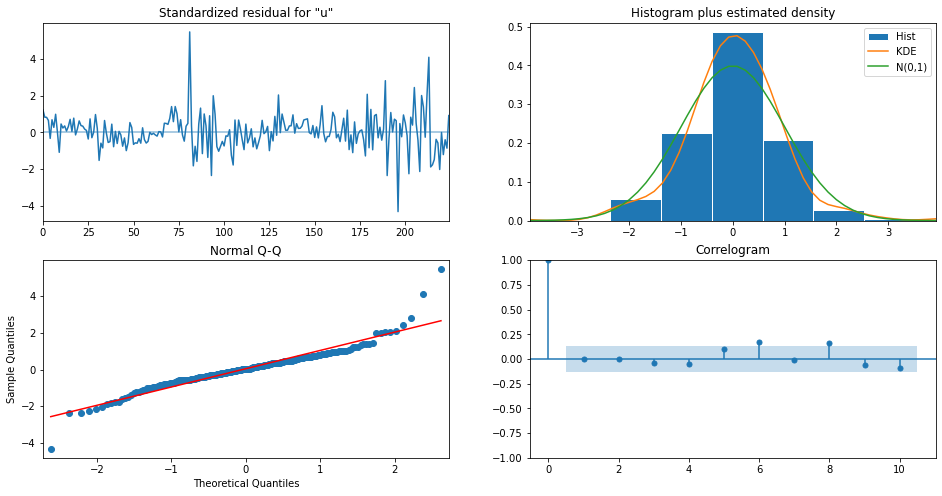

In [54]:
res1.plot_diagnostics(figsize=(16, 8))
plt.show()

### 소비자물가지수

In [55]:
mod2 = sm.tsa.statespace.SARIMAX(df['cpi'], df['inter'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12), enforce_stationarity=False,
                                    enforce_invertibility=False)
res2 = mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                cpi   No. Observations:                  264
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -259.036
Date:                            Fri, 25 Feb 2022   AIC                            522.072
Time:                                    11:06:33   BIC                            529.115
Sample:                                         0   HQIC                           524.907
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
inter         -0.1500      6.577     -0.023      0.982     -13.041      12.741
sigma2         0.4651      0.038     12.217      0.000       0.390       0.540
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):                 2.35
Prob(Q):                              0.25   Prob(JB):                         0.31
Heteroskedasticity (H):               0.73   Skew:                            -0.13
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

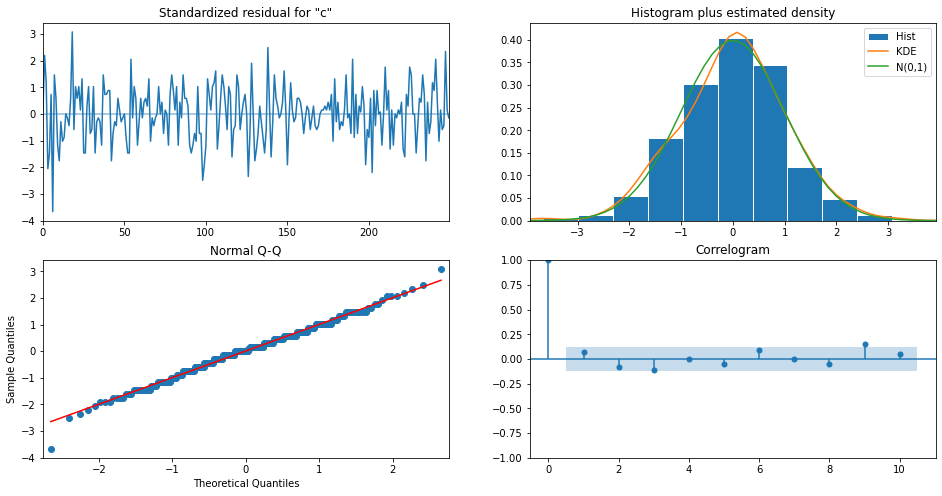

In [56]:
res2.plot_diagnostics(figsize=(16, 8))
plt.show()

### 평잔증가량

In [57]:
mod3 = sm.tsa.statespace.SARIMAX(df['abi'], df['inter'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                    enforce_invertibility=False)
res3 = mod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                abi   No. Observations:                  264
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -654.135
Date:                            Fri, 25 Feb 2022   AIC                           1316.270
Time:                                    11:06:34   BIC                           1330.159
Sample:                                         0   HQIC                          1321.868
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
inter         -0.1412      8.210     -0.017      0.986     -16.232      15.949
ar.L1         -0.4634      0.043    -10.703      0.000      -0.548      -0.379
ar.S.L12      -0.6752      0.033    -20.558      0.000      -0.740      -0.611
sigma2        14.2832      1.063     13.437      0.000      12.200      16.367
===================================================================================
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):                16.23
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

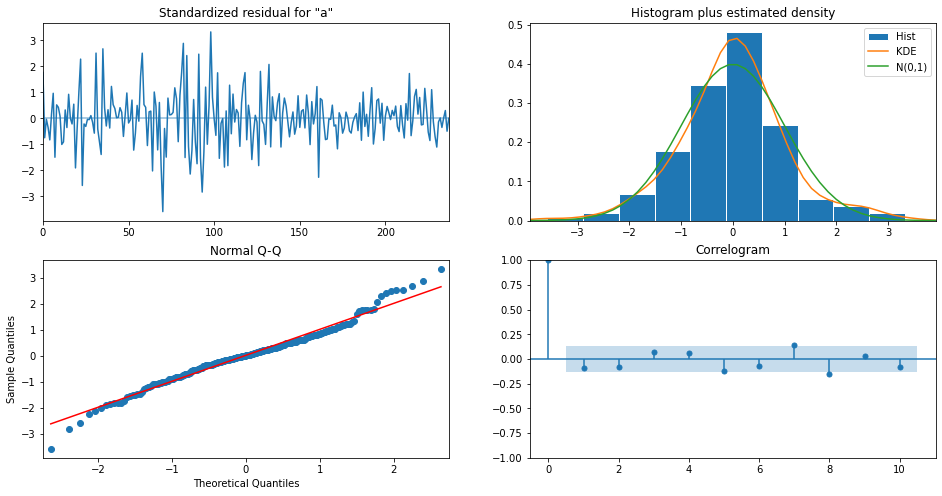

In [58]:
res3.plot_diagnostics(figsize=(16, 8))
plt.show()

In [59]:
df_hi.reset_index(drop=True, inplace=True)

In [60]:
df_hi

0      0.5
1      0.7
2      1.0
3      1.4
4      1.7
      ... 
187    1.3
188    1.2
189    1.1
190    0.8
191    0.3
Name: hi, Length: 192, dtype: float64

In [61]:
df_inter_cut = df['inter'].iloc[72:]

In [62]:
df_inter_cut.reset_index(drop=True, inplace=True)

In [63]:
df_inter_cut

0      0
1      0
2      0
3      0
4      0
      ..
187    1
188    1
189    1
190    1
191    1
Name: inter, Length: 192, dtype: int32

### 주택매매가격변동률

In [64]:
mod4 = sm.tsa.statespace.SARIMAX(df_hi, df_inter_cut, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12), enforce_stationarity=False,
                                    enforce_invertibility=False)
res4 = mod4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 hi   No. Observations:                  192
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  51.150
Date:                            Fri, 25 Feb 2022   AIC                            -90.299
Time:                                    11:06:35   BIC                            -71.209
Sample:                                         0   HQIC                           -82.558
                                            - 192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
inter          0.3546      0.141      2.521      0.012       0.079       0.630
ar.L1          0.7934      0.050     15.726      0.000       0.695       0.892
ma.L1          0.2900      0.079      3.652      0.000       0.134       0.446
ar.S.L12       0.0298      0.077      0.386      0.699      -0.122       0.181
ma.S.L12      -0.0138      0.111     -0.124      0.902      -0.232       0.204
sigma2         0.0329      0.002     13.908      0.000       0.028       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                86.82
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.53
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

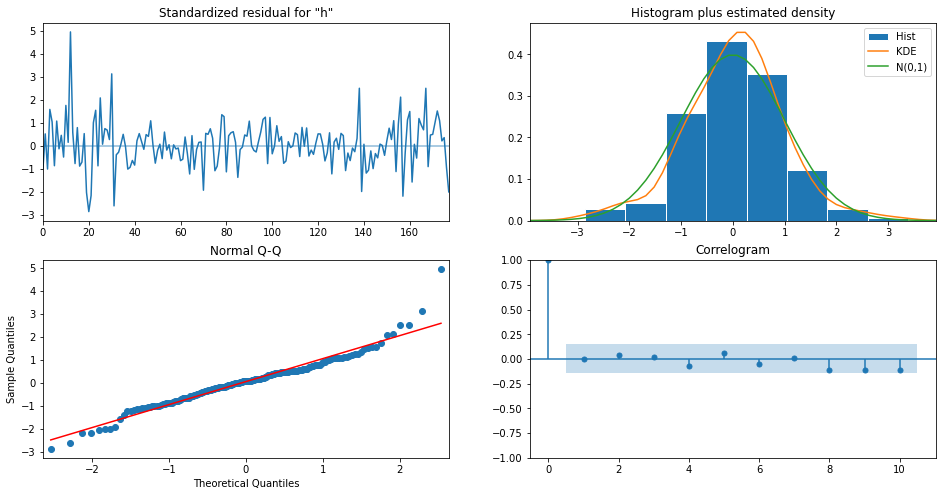

In [65]:
res4.plot_diagnostics(figsize=(16, 8))
plt.show()

### 환율

In [66]:
mod5 = sm.tsa.statespace.SARIMAX(df['er'], df['inter'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12), enforce_stationarity=False,
                                    enforce_invertibility=False)
res5 = mod5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 er   No. Observations:                  264
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -661.762
Date:                            Fri, 25 Feb 2022   AIC                           1331.525
Time:                                    11:06:35   BIC                           1345.627
Sample:                                         0   HQIC                          1337.200
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
inter         -2.2771      2.842     -0.801      0.423      -7.847       3.293
ar.L1          0.8284      0.017     47.844      0.000       0.794       0.862
ar.S.L12      -0.1357      0.067     -2.012      0.044      -0.268      -0.004
sigma2        11.4176      0.691     16.517      0.000      10.063      12.772
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                94.84
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.79
Prob(H) (two-sided):                  0.44   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

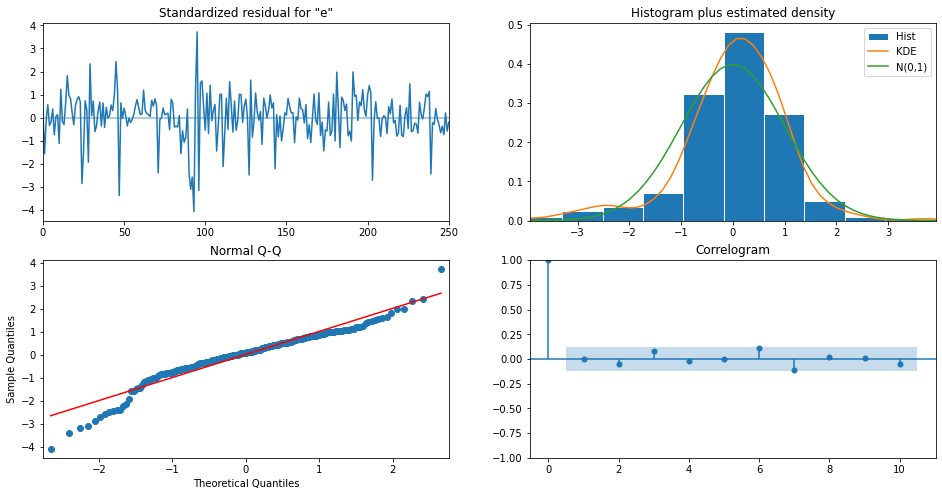

In [67]:
res5.plot_diagnostics(figsize=(16, 8))
plt.show()

### 콜금리

In [68]:
mod6 = sm.tsa.statespace.SARIMAX(df['call'], df['inter'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                    enforce_invertibility=False)
res6 = mod6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               call   No. Observations:                  264
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 163.548
Date:                            Fri, 25 Feb 2022   AIC                           -319.096
Time:                                    11:06:36   BIC                           -305.206
Sample:                                         0   HQIC                          -313.498
                                            - 264                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
inter          0.0683      0.098      0.698      0.485      -0.124       0.260
ar.L1          0.6624      0.033     20.353      0.000       0.599       0.726
ar.S.L12      -0.4506      0.034    -13.236      0.000      -0.517      -0.384
sigma2         0.0148      0.001     15.592      0.000       0.013       0.017
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):               138.09
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.54
Prob(H) (two-sided):                  0.32   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

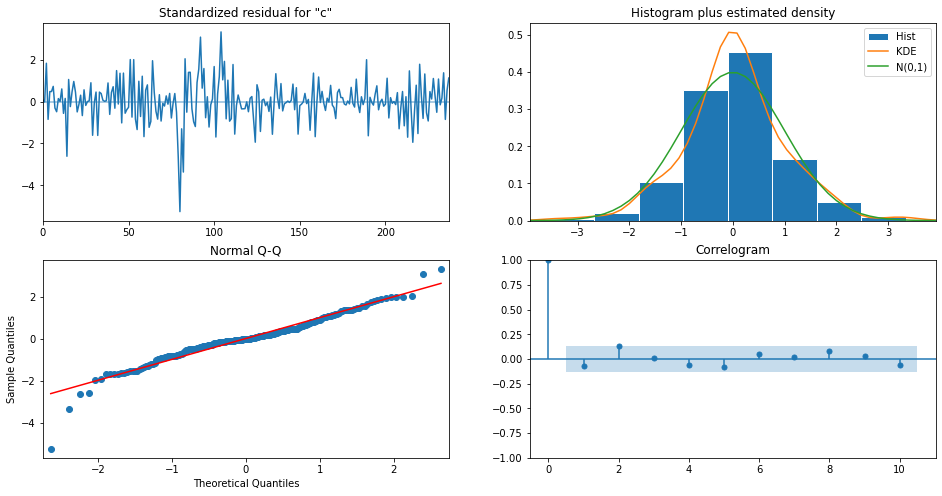

In [69]:
res6.plot_diagnostics(figsize=(16, 8))
plt.show()